# Preprocessing Data of Seul Bike Rental prediction

• predict the required number of bikes for rental given information
    about the weather and time of the day
    

• The dataset provided in this competition is obtained from UC 
    Irvine Machine Learning Repository - Seoul Bike Sharing Demand 
    Dataset

In [75]:
# Imports librarins
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

%matplotlib inline

## Fetching Data

In [76]:
TRAIN_PATH = "E://My_APP//data//train.csv"
TEST_PATH =  "E://My_APP//data//test.csv"

training_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

In [77]:
# Check shape of data
training_df

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,5755,20/11/2018,1317,19,8.7,34,2.2,1857,-6.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
5756,5756,20/11/2018,1078,20,8.5,32,2.6,1789,-7.2,0.0,0.0,0.0,Autumn,No Holiday,Yes
5757,5757,20/11/2018,1020,21,8.8,37,3.8,1750,-5.1,0.0,0.0,0.0,Autumn,No Holiday,Yes
5758,5758,20/11/2018,922,22,8.9,40,3.4,1810,-3.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


## Data Preparation

In [78]:
# adjusting column names of the train data
col_names = ['ID', 'Date', 'y', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature',
       'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning Day']
training_df.columns = col_names

# adjusting column names of the test data
col_names = ['ID', 'Date','Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature',
       'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning Day']
test_df.columns = col_names

In [79]:
# adjusting Date 
def adjust_date(train_df, test_df):
    
    '''
    This function is used to adjust date type and creating
        new features of all dataset.
    
    paramters: 
    
    train_df (dataframe)
    test_df  (dataframe)
    
    returns:
    
    adjusted_training_df (dataframe)
    adjusted_test_df     (dataframe)
    
    '''
    
    # Looping over all dataset 
    for data in [train_df, test_df] :
   
        data['Date'] = pd.to_datetime(data['Date'])
        #train_df['Month'] = train_df['Date'].dt.month.astype(int)
        #train_df['Weekday'] = train_df['Date'].dt.dayofweek.astype(int)
        data['Year'] = data['Date'].dt.year.astype(int)
        #data['Month'] = data['Date'].dt.strftime('%B')
        data['day'] = data['Date'].dt.day
        data['Weekday'] = data['Date'].dt.dayofweek
        data['Month'] = data['Date'].dt.month
        #data['Year'] = data['Date'].dt.year
        
    return train_df,test_df

training_df, test_df = adjust_date(training_df,test_df)

In [80]:
training_df.head()

,ID,Date,y,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Year,day,Weekday,Month
0,0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,3,1
1,1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,3,1
2,2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,3,1
3,3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,3,1
4,4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,3,1


In [81]:
# Encoding and creating features of your dataset
def encoding_features(train_df, test_df):
    
    for data in [train_df, test_df]:
        # Encoding
        data.loc[data['Rainfall'] != 0, 'Rainfall'] = 1
        data['Visibility'] = np.log(data['Visibility'])
        data['Solar Radiation'] = np.sqrt(data['Solar Radiation'])
        data['Holiday'] = data['Holiday'].astype('category').cat.codes


        data.loc[data['Functioning Day'] == 'Yes', 'Functioning Day'] = 1
        data.loc[data['Functioning Day'] == 'No', 'Functioning Day'] = 0
        data['Functioning Day'] = data['Functioning Day'].astype(int)

        data['Hot'] = 0
        data.loc[data['Temperature'] >= 20, 'Hot'] = 1

        data['isOfficeHour'] = 0
        data.loc[(data['Hour'] >= 17) & (data['Hour']<=20), 'isOfficeHour'] = 1
        data.loc[(data['Hour'] >= 7) & (data['Hour']<=9), 'isOfficeHour'] = 1

        # Encoding and creating features according to time
        data['weekend'] = 0
        data.loc[data['Weekday'] == 'Sunday', 'weekend'] = 1
        data['Year'] = data['Year'].map({2017:0, 2018:1})
        data['hour_range'] = pd.cut(data['Hour'],\
            [0,3,6,9,12,15,18,21,24], include_lowest = True)
        data['month_range'] = pd.cut(data['Month'],\
            [1,4,8,12], include_lowest = True)
        data['day_range'] = pd.cut(data['Weekday'],\
            [0,2,4,6], include_lowest = True)
        data['Hour_sin'] = np.sin(2 * np.pi * data['Hour']/23)

        # Iterating overdataset for encoding
        for i,row in data.iterrows():
            if row.Seasons in ["Autumn","Spring","Summer"]:
                data.at[i,"Remaining_Seasons"]=1
            else:
                data.at[i,"Remaining_Seasons"]=0

        for i,row in data.iterrows():
            if row.Weekday in ["Saturday","Sunday"]:
                data.at[i,"Sunday_Saturday"]=1
            else:
                data.at[i,"Sunday_Saturday"]=0

        for i,row in data.iterrows():
            if row.Weekday in ["Thursday","Tuesday","Wednesday",\
                "Friday","Monday"]:
                data.at[i,"Remaining_Weekday"]=1
            else:
                data.at[i,"Remaining_Weekday"]=0

        for i,row in data.iterrows():
            if row.Weekday in ["Thursday","Tuesday","Wednesday",\
                "Friday","Monday"]:
                data.at[i,"Remaining_Weekday"]=1
            else:
                data.at[i,"Remaining_Weekday"]=0

        for i,row in data.iterrows():
            if row["Functioning Day"] in ["Yes"] and row.Holiday\
                in ["No Holiday"]:
                data.at[i,"Yes_Noholiday"]=1
            else:
                data.at[i,"Yes_Noholiday"]=0
                
        return train_df, test_df
    
# Calling encoding_features Function  
training_df, test_df=encoding_features(training_df, test_df)

In [82]:
training_df.head()

,ID,Date,y,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Year,day,Weekday,Month,Hot,isOfficeHour,weekend,hour_range,month_range,day_range,Hour_sin,Remaining_Seasons,Sunday_Saturday,Remaining_Weekday,Yes_Noholiday
0,0,2017-01-12,254,0,-5.2,37,2.2,7.600902,-17.6,0.0,0.0,0.0,Winter,1,1,0,12,3,1,0,0,0,"(-0.001, 3.0]","(0.999, 4.0]","(2.0, 4.0]",0.000000,0.0,0.0,0.0,0.0
1,1,2017-01-12,204,1,-5.5,38,0.8,7.600902,-17.6,0.0,0.0,0.0,Winter,1,1,0,12,3,1,0,0,0,"(-0.001, 3.0]","(0.999, 4.0]","(2.0, 4.0]",0.269797,0.0,0.0,0.0,0.0
2,2,2017-01-12,173,2,-6.0,39,1.0,7.600902,-17.7,0.0,0.0,0.0,Winter,1,1,0,12,3,1,0,0,0,"(-0.001, 3.0]","(0.999, 4.0]","(2.0, 4.0]",0.519584,0.0,0.0,0.0,0.0
3,3,2017-01-12,107,3,-6.2,40,0.9,7.600902,-17.6,0.0,0.0,0.0,Winter,1,1,0,12,3,1,0,0,0,"(-0.001, 3.0]","(0.999, 4.0]","(2.0, 4.0]",0.730836,0.0,0.0,0.0,0.0
4,4,2017-01-12,78,4,-6.0,36,2.3,7.600902,-18.6,0.0,0.0,0.0,Winter,1,1,0,12,3,1,0,0,0,"(3.0, 6.0]","(0.999, 4.0]","(2.0, 4.0]",0.887885,0.0,0.0,0.0,0.0


In [83]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     5760 non-null   int64         
 1   Date                   5760 non-null   datetime64[ns]
 2   y                      5760 non-null   int64         
 3   Hour                   5760 non-null   int64         
 4   Temperature            5760 non-null   float64       
 5   Humidity               5760 non-null   int64         
 6   Wind speed             5760 non-null   float64       
 7   Visibility             5760 non-null   float64       
 8   Dew point temperature  5760 non-null   float64       
 9   Solar Radiation        5760 non-null   float64       
 10  Rainfall               5760 non-null   float64       
 11  Snowfall               5760 non-null   float64       
 12  Seasons                5760 non-null   object        
 13  Hol

## Preprocessing

In [84]:
# Dropping some features
training_df.drop(columns = ['ID', 'Date','Snowfall','Visibility'],\
    axis = 1, inplace = True)

X_test = test_df.drop(columns = ['ID', 'Date','Snowfall','Visibility'],\
    axis = 1)

In [85]:
# Onehot encoding
training_df = pd.get_dummies(training_df)

X_test = pd.get_dummies(X_test)

In [86]:
training_df.head()

,y,Hour,Temperature,Humidity,Wind speed,Dew point temperature,Solar Radiation,Rainfall,Holiday,Functioning Day,Year,day,Weekday,Month,Hot,isOfficeHour,weekend,Hour_sin,Remaining_Seasons,Sunday_Saturday,Remaining_Weekday,Yes_Noholiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,"hour_range_(-0.001, 3.0]","hour_range_(3.0, 6.0]","hour_range_(6.0, 9.0]","hour_range_(9.0, 12.0]","hour_range_(12.0, 15.0]","hour_range_(15.0, 18.0]","hour_range_(18.0, 21.0]","hour_range_(21.0, 24.0]","month_range_(0.999, 4.0]","month_range_(4.0, 8.0]","month_range_(8.0, 12.0]","day_range_(-0.001, 2.0]","day_range_(2.0, 4.0]","day_range_(4.0, 6.0]"
0,254,0,-5.2,37,2.2,-17.6,0.0,0.0,1,1,0,12,3,1,0,0,0,0.000000,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,204,1,-5.5,38,0.8,-17.6,0.0,0.0,1,1,0,12,3,1,0,0,0,0.269797,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,173,2,-6.0,39,1.0,-17.7,0.0,0.0,1,1,0,12,3,1,0,0,0,0.519584,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,107,3,-6.2,40,0.9,-17.6,0.0,0.0,1,1,0,12,3,1,0,0,0,0.730836,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,78,4,-6.0,36,2.3,-18.6,0.0,0.0,1,1,0,12,3,1,0,0,0,0.887885,0.0,0.0,0.0,0.0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0


## EDA

Text(0.5, 1.0, 'Correlation Analysis')

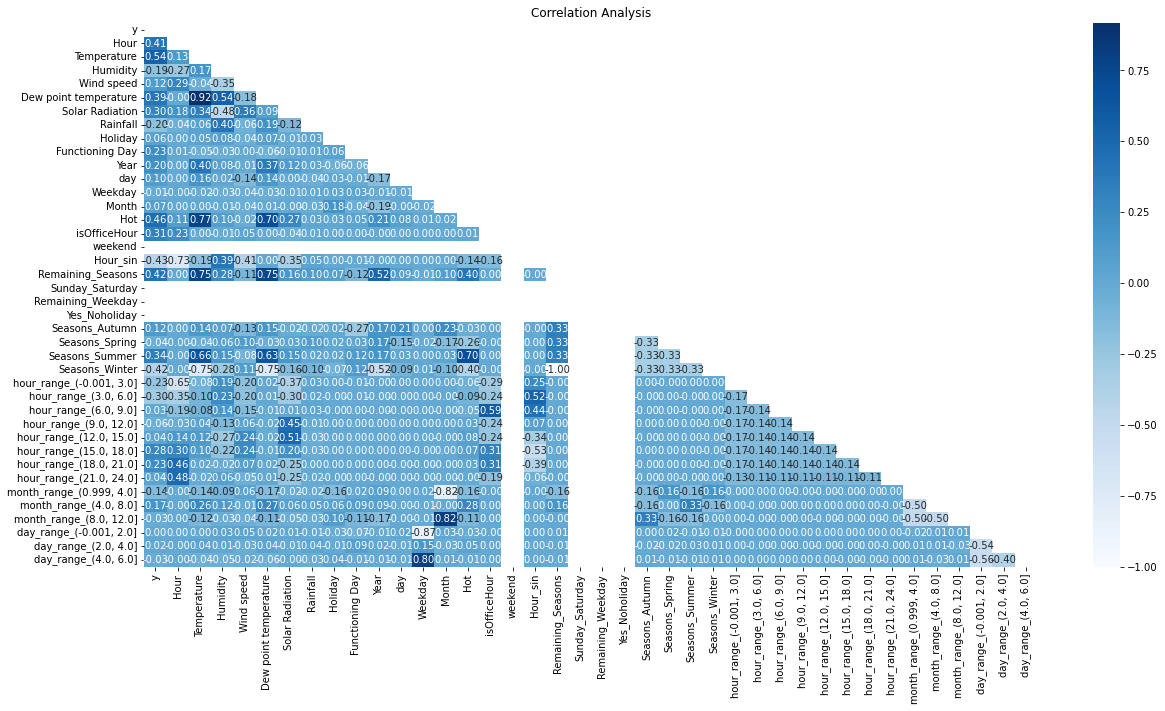

In [87]:
# Correlation Matrix heatmap
corr_matrix = training_df.corr()
mask = np.triu(np.ones_like(corr_matrix,dtype = bool))
plt.figure(figsize = (20,10))
sns.heatmap(corr_matrix, fmt = '0.2f', cmap = 'Blues', mask = mask, annot = True)
plt.title("Correlation Analysis")

# Spliting Data

In [88]:
features= training_df.drop(columns = ['y'])
target = np.log1p(training_df['y'])

# Splitting your data
X_train, X_val, y_train, y_val = train_test_split(features, target,\
        test_size = 0.15, shuffle = True, random_state = 42)

# Saving data 

In [89]:
X_train.to_pickle("E:/My_APP/data/preprocesseddata/X_train.pkl")
X_val.to_pickle("E:/My_APP/data/preprocesseddata/X_val.pkl")
X_test.to_pickle("E:/My_APP/data/preprocesseddata/X_test.pkl")

y_train.to_pickle("E:/My_APP/data/preprocesseddata/y_train.pkl")
y_val.to_pickle("E:/My_APP/data/preprocesseddata/y_val.pkl")


Note: Theses saved Data will be used in traing_model.ipynb file to build
our model